# PART 1

PyTorch Version: 2.0.1


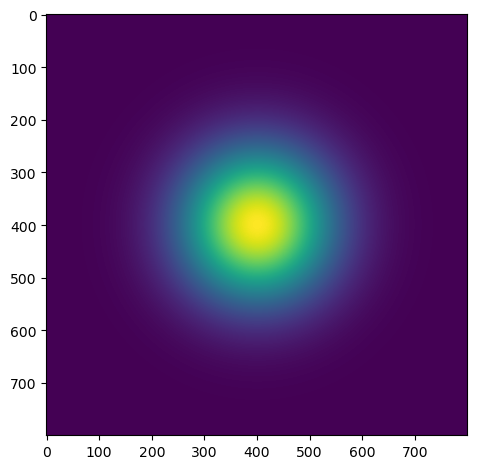

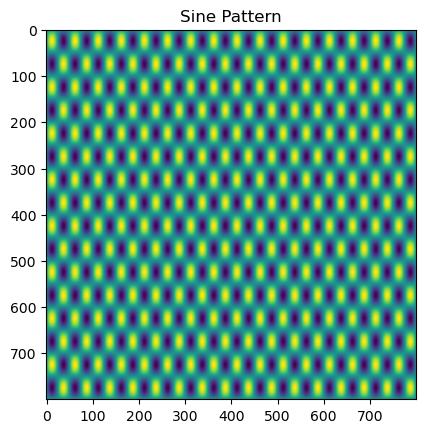

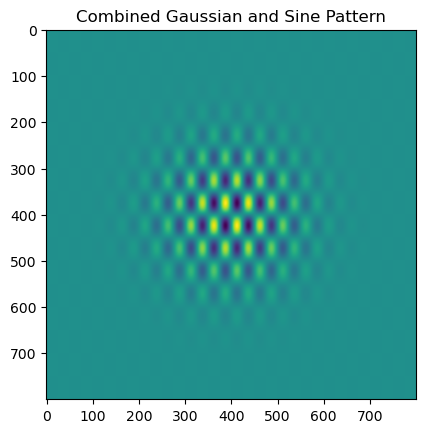

In [4]:
import torch
import numpy as np
print("PyTorch Version:", torch.__version__)
device = torch.device('mps')
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.exp(-(x**2+y**2)/2.0)

def sine_function(x, y, frequency_x, frequency_y):
        return torch.sin(2 * torch.pi * frequency_x * x) * torch.sin(2 * torch.pi * frequency_y * y)
frequency_x = 1
frequency_y = 2

sine_pattern = sine_function(x, y, frequency_x, frequency_y)
combined_pattern = z * sine_pattern

import matplotlib.pyplot as plt
z=z.cpu()
plt.imshow(z.cpu().numpy())
plt.tight_layout()
plt.show()


plt.imshow(sine_pattern)
plt.title("Sine Pattern")
plt.show()

plt.imshow(combined_pattern.cpu().numpy())
plt.title("Combined Gaussian and Sine Pattern")
plt.show()







# PART 2

/var/folders/vm/k6nl2whd6_j2vp_0sj8043t00000gn/T/ipykernel_8153/2181844490.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


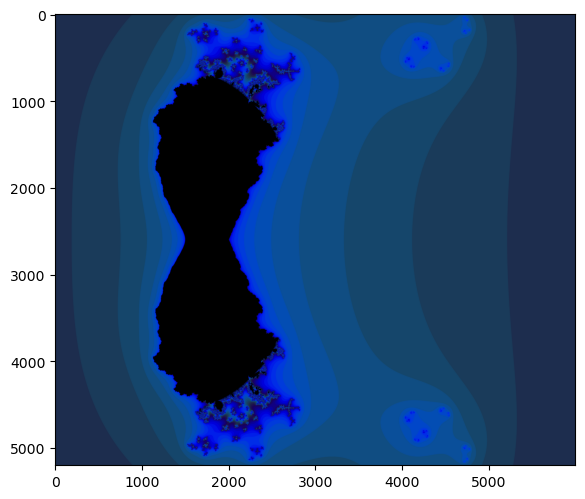

In [24]:
import torch
import numpy as np

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

Y, X = np.mgrid[-1.3:1.3:0.0005, -2:1:0.0005]

x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)
zs = z.clone()
ns = torch.zeros_like(z)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# Mandelbrot Set
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs * zs + z
    zs_ = zs_*0.8+1
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged
    zs = zs_ 
    import matplotlib.pyplot as plt

# Processing the fractal image
image = processFractal(ns.cpu().numpy())

# Display the processed fractal image
plt.imshow(image)
plt.tight_layout(pad=0)
plt.show()



/var/folders/vm/k6nl2whd6_j2vp_0sj8043t00000gn/T/ipykernel_8153/2185003648.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.uint8(np.clip(array, 0, 255))


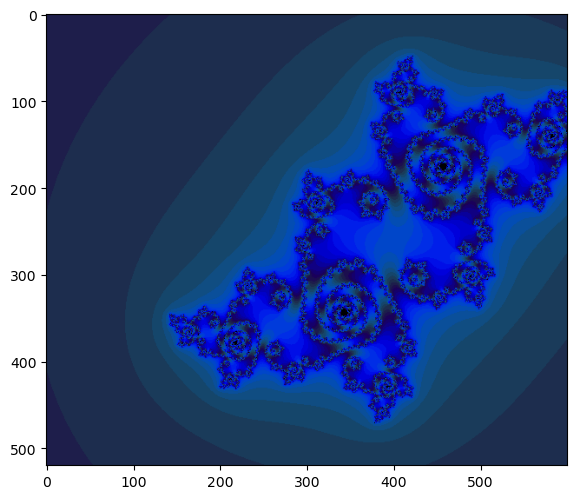

In [11]:
import torch
import numpy as np


# Defining the grid
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)
zs = z.clone()
ns = torch.zeros_like(z)

# Moving tensors to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# Julia Set
c_realnum= torch.tensor(-0.19)
c_imagnum = torch.tensor(0.66)

c = torch.complex(c_realnum, c_imagnum)
for i in range(200):
    
    zs_ = zs * zs + c
    
    not_diverged = torch.abs(zs_) < 4

    ns += not_diverged
    zs = zs_
    import matplotlib.pyplot as plt
    zs_=zs.cpu()

# Defining the processFractal function
def processFractal(array):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    array_cyclic = (6.28 * array / 20.0).reshape(list(array.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(array_cyclic),
                          30 + 50 * np.sin(array_cyclic),
                          155 - 80 * np.cos(array_cyclic)], 2)
    img[array == array.max()] = 0
    array = img
    array = np.uint8(np.clip(array, 0, 255))
    return array

# Displaying the processed fractal image
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


# PART 3

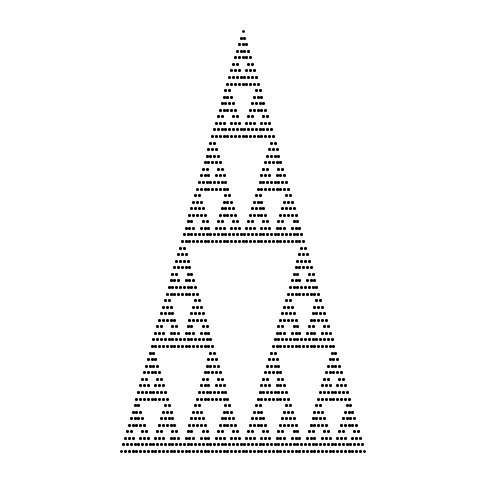

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def sierpinskitriangle(a, b, c, depth):
    if depth == 0:
        return [a, b, c]
    
    # Calculating midpoints of the edges
    midpoint1 = (a + b) / 2
    midpoint2 = (b + c) / 2
    midpoint3 = (a + c) / 2
    
    # Recurse on  3 smaller triangles
    points1 = sierpinskitriangle(a, midpoint1, midpoint3, depth - 1)
    points2 = sierpinskitriangle(midpoint1, b, midpoint2, depth - 1)
    points3 = sierpinskitriangle(midpoint3, midpoint2, c, depth - 1)
    
    return points1 + points2 + points3

# Initial triangle vertices
vertices = np.array([[0, 0], [1, 2*np.sqrt(3)], [2, 0]])

# Generate Sierpinski triangle points
depth = 6 # Adjust the depth
sierpinskitriangle_points = sierpinskitriangle(vertices[0], vertices[1], vertices[2], depth)

# Convert points to NumPy array
sierpinskitriangle_points = np.array(sierpinskitriangle_points)

# Extract x and y coordinates for plotting
x_coordinates, y_coordinates = sierpinskitriangle_points[:, 0], sierpinskitriangle_points[:, 1]

# Plot the Sierpinski triangle fractal
plt.figure(figsize=(6, 6))
plt.scatter(x_coordinates, y_coordinates, s=1, c='black')
plt.axis('equal')
plt.axis('off')
plt.show()



